In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive
from keras.models import  Model, Sequential
import numpy as np

## **Import Data**

In [3]:
tf.test.gpu_device_name()

''

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Processing**

In [5]:
TARGET_SIZE = (224,224)
BATCH_SIZE = 16
TRAINING_DIR = "/content/drive/MyDrive/Capstone/training"
VALIDATION_DIR = "/content/drive/MyDrive/Capstone/validation"

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      target_size=TARGET_SIZE,
                                                      class_mode='categorical',
                                                      batch_size=BATCH_SIZE,
                                                      shuffle=False
                                                      )
  
validation_datagen = ImageDataGenerator( rescale = 1./255. )
validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                target_size=TARGET_SIZE,
                                                                class_mode='categorical',
                                                                batch_size=BATCH_SIZE,
                                                                shuffle=False
                                                                )  

Found 4277 images belonging to 3 classes.
Found 477 images belonging to 3 classes.


In [7]:
for cls, idx in train_generator.class_indices.items():
    print('Class nr ',idx,' -> ', cls)

Class nr  0  ->  crack
Class nr  1  ->  good
Class nr  2  ->  pothole


# **Model Resnet**

In [8]:
from keras.models import  Model, Sequential
from keras import models, layers, optimizers
from tensorflow.keras.applications import ResNet50

#Load the ResNet50 model
ResNet50_conv = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in ResNet50_conv.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in ResNet50_conv.layers:
    print(layer, layer.trainable)

# Create the model
model = models.Sequential()
# Add the Resnet50
model.add(ResNet50_conv)

# Add new layers
model.add(layers.Flatten()),
model.add(layers.Dense(512, activation='relu')),
model.add(layers.Dense(32, activation='relu')),
model.add(layers.Dense(32, activation='relu')),
model.add(layers.Dropout(0.2)),
model.add(layers.Dense(3, activation='softmax'))


# Show a summary of the model. Check the number of trainable parameters
model.summary()

94765736/94765736 [==============================] - 4s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f47943970a0> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f470238db40> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f470238e260> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f470238f550> True
<keras.layers.core.activation.Activation object at 0x7f4702337700> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f4700a60dc0> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f4700a61d20> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f4700a63d90> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f4700a62a10> True
<keras.layers.core.activation.Activation object at 0x7f4700a622c0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f4700abdc60> True
<keras.layers.normalization.batch_normalization.BatchNormali

In [9]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-7)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

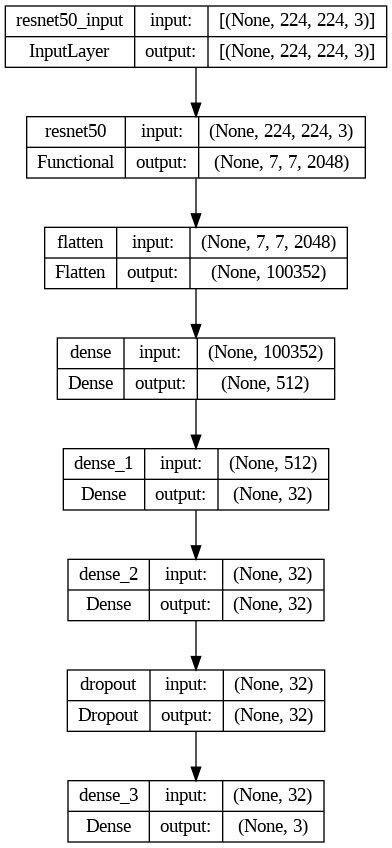

In [10]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [11]:
model_history = model.fit(train_generator, batch_size=16, epochs=5, verbose=1, validation_data=(validation_generator))

Epoch 1/5
268/268 [==============================] - 4027s 15s/step - loss: 0.7571 - accuracy: 0.7926 - val_loss: 7.7790 - val_accuracy: 0.3354
Epoch 2/5
268/268 [==============================] - 3825s 14s/step - loss: 0.2123 - accuracy: 0.9338 - val_loss: 1.9158 - val_accuracy: 0.2851
Epoch 3/5
268/268 [==============================] - 3779s 14s/step - loss: 0.1905 - accuracy: 0.9483 - val_loss: 0.5808 - val_accuracy: 0.7484
Epoch 4/5
268/268 [==============================] - 3756s 14s/step - loss: 0.0605 - accuracy: 0.9825 - val_loss: 0.9979 - val_accuracy: 0.7694
Epoch 5/5
268/268 [==============================] - 3697s 14s/step - loss: 0.0354 - accuracy: 0.9911 - val_loss: 0.4010 - val_accuracy: 0.9057


# **File H5**

In [17]:
save_model = "model_CNN.h5"
model.save(save_model)
print("Model Saved into", save_model)

Model Saved into model_CNN.h5


In [ ]:
# And download it using this shortcut or from the "Files" panel to the left
from google.colab import files

files.download("model_CNN.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Check**

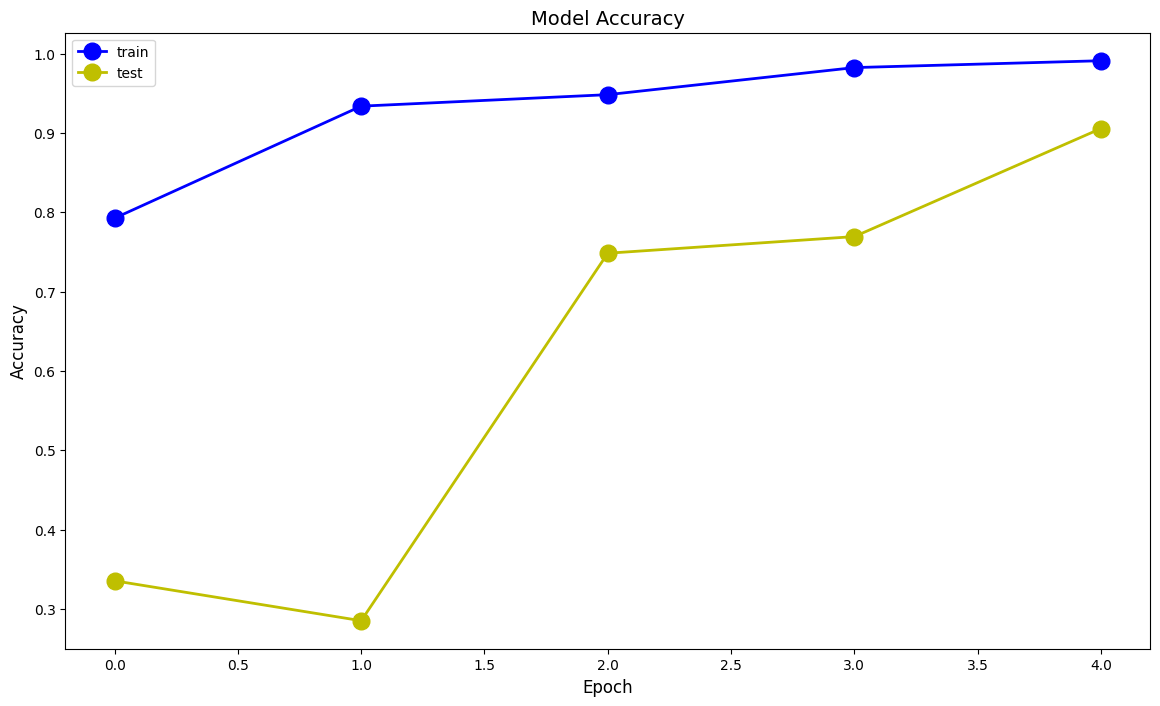

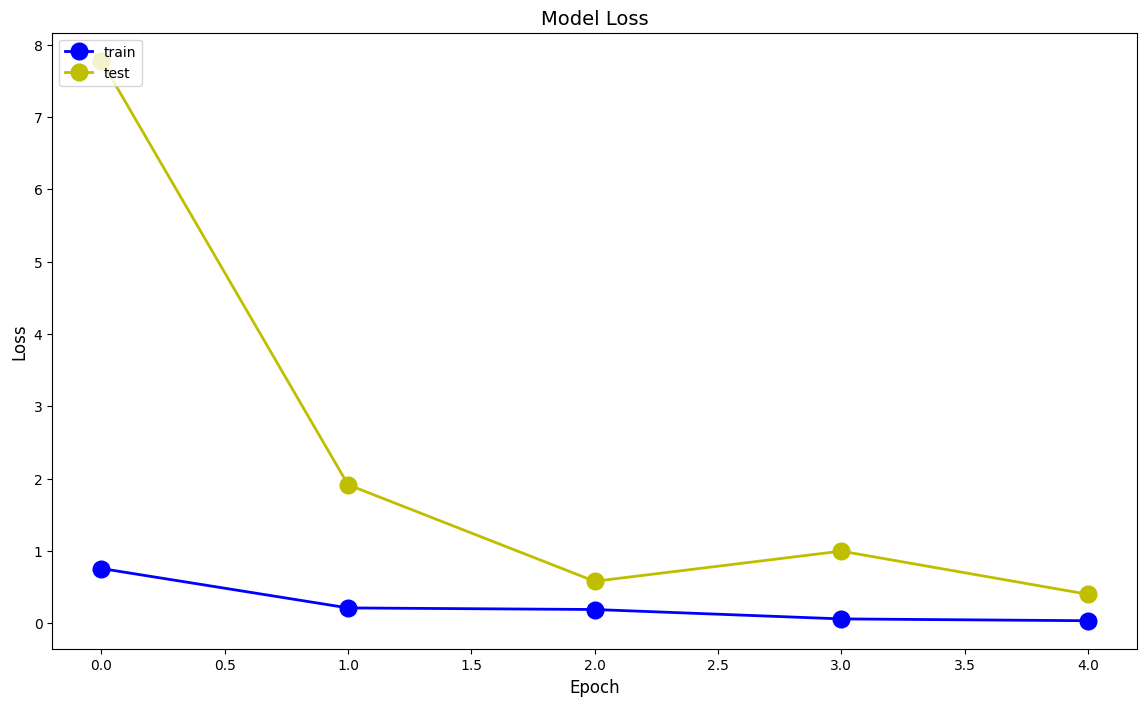

In [13]:
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'], 'bo-', linewidth=2, markersize=12)
plt.plot(model_history.history['val_accuracy'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'], 'bo-', linewidth=2, markersize=12 )
plt.plot(model_history.history['val_loss'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
target_names = []
for key in train_generator.class_indices:
  target_names.append(key)

print(target_names)

['crack', 'good', 'pothole']


In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

30/30 [==============================] - 96s 3s/step - loss: 0.4115 - accuracy: 0.9057
n Test_Accuracy:- 0.9056603908538818
30/30 [==============================] - 96s 3s/step
confusion matrix
[[125   0  33]
 [  8 152   0]
 [  4   0 155]]


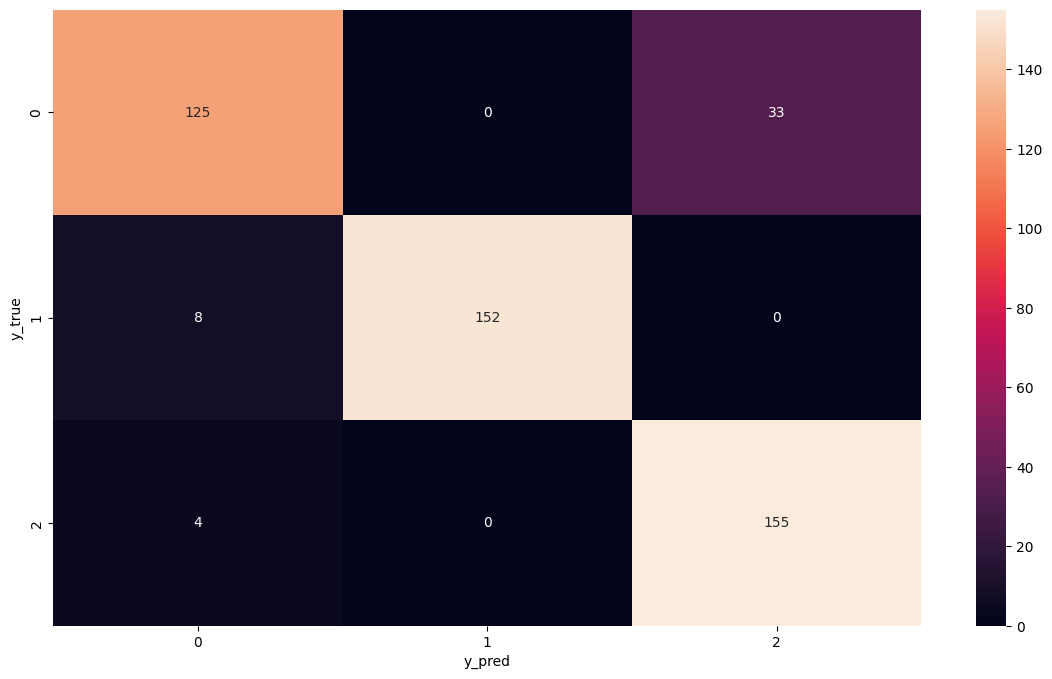

In [16]:
accuracy = model.evaluate(validation_generator)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
#confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(validation_generator.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

class_names = ['crack', 'pothole']

for fn in uploaded.keys():
 
  # Memprediksi gambar
  path = '/content/' + fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)
  predicted_class_index = np.argmax(predictions[0])
  predicted_class = class_names[predicted_class_index]

  print(f"{fn} is {predicted_class}")

Saving Pothole_0039.jpg to Pothole_0039.jpg
1/1 [==============================] - 0s 40ms/step
Pothole_0039.jpg is pothole
